In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from SALib.analyze import sobol, pawn

# Import files
from stochs import param_dict
from parameters import params

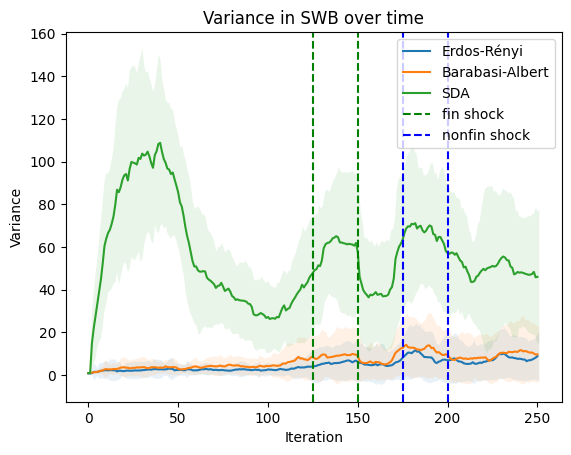

In [5]:
# Variance over the different networks

title_add = ""
network_names = ["Erdos-Rényi", "Barabasi-Albert", "SDA"]
for i, network in enumerate(["Rd", "BA", "SDA"]):
    data = np.load(f"data/{network}_output_50_.npy")
    SWB_var = np.var(data[0], axis=2)
    labels = ["SWB", "Fin", "Nonfin", "RFC", "Soccap"]
    line_widths = [1, 1, 1, 1, 1]
    colours = ["black", "g", "b", "r", "purple"]
    markers = ["o", "s", "^", "x", "d"]

    intervention_timesteps =  [125, 150, 175, 200]
    int_var = ["fin", "fin", "nonfin", "nonfin"]
    added_to_legend = []

    plt.plot(np.mean(SWB_var, axis=0), label=network_names[i])
    mean = np.mean(SWB_var, axis=0)
    std = np.std(SWB_var, axis=0)
    plt.fill_between(np.linspace(0, len(mean), len(mean)), mean-std, mean+std, alpha=0.1)
for intervention_index, intervention in enumerate(intervention_timesteps):
    if int_var[intervention_index] == "fin":
        line_color = "green"
    elif int_var[intervention_index] == "nonfin":
        line_color = "blue"
    if int_var[intervention_index] not in added_to_legend:
        plt.axvline(x=intervention, color=line_color, linestyle='--', label=int_var[intervention_index] + " shock")
        added_to_legend.append(int_var[intervention_index])
    else:
        plt.axvline(x=intervention, color=line_color, linestyle='--')
plt.legend()
plt.title(f"Variance in SWB over time")
plt.xlabel("Iteration")
plt.ylabel(f"Variance")
plt.savefig(f"figures/var_total{title_add}.pdf", dpi=300)
plt.show()

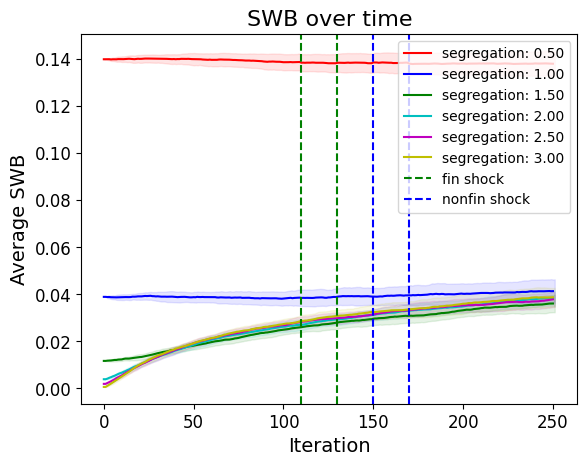

In [7]:
# OFAT plot over a parameter
param_name = "segregation"

param_dict = {
            'm' : [1, 26],
            'p' : [0.05, 0.3],
            'segregation': [0.5, 3],
            'beta' : [1, 6]}

data = np.load(f"data/stochplot_{param_name}.npz")
SWB_data = data["arr_8"]
param_steps = np.linspace(param_dict[param_name][0], param_dict[param_name][1], 6)
intervention_timesteps = params["int_ts"]
int_var = params["int_var"]
title_add = ""

line_color = "black"
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:brown', 'tab:pink', 'tab:gray']
added_to_legend = []
for index, param_step in enumerate(SWB_data):
    stds = np.std(param_step, axis=0)
    means = np.mean(param_step, axis=0)
    plt.fill_between(np.linspace(0, len(means), len(means)), means-stds, means+stds, color=colors[index], alpha=0.1)
    plt.plot(means, label=f"{param_name}: {param_steps[index]:.2f}", color=colors[index])
for index, intervention in enumerate(intervention_timesteps):
    if int_var[index] == "fin":
        line_color = "green"
    elif int_var[index] == "nonfin":
        line_color = "blue"
    if int_var[index] not in added_to_legend:
        plt.axvline(x=intervention, color=line_color, linestyle='--', label=int_var[index] + " shock")
        added_to_legend.append(int_var[index])
    else:
        plt.axvline(x=intervention, color=line_color, linestyle='--')
plt.legend()
plt.title("SWB over time", fontsize=16)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Average SWB", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(f"figures/OFAT/{title_add}{param_name}/SWB.pdf", dpi=300)
plt.show()

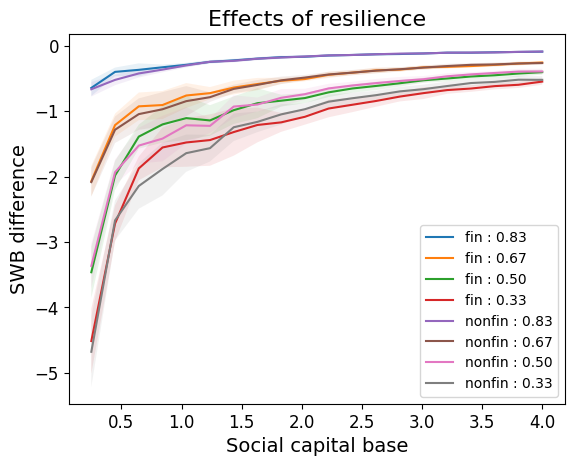

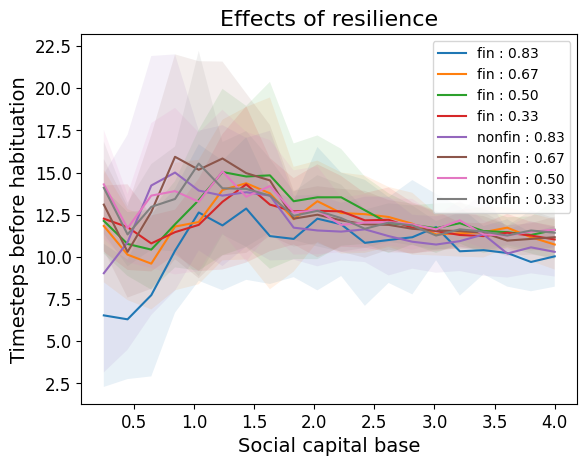

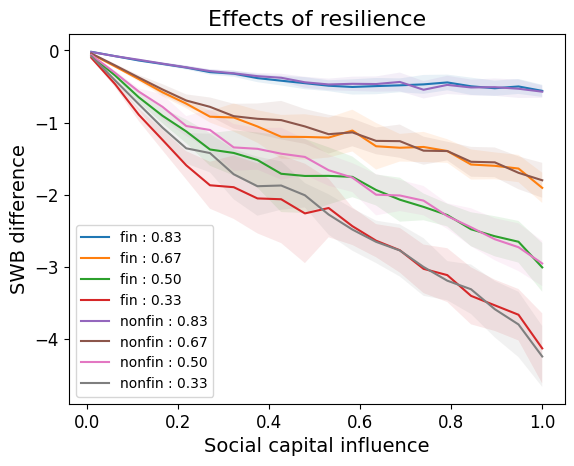

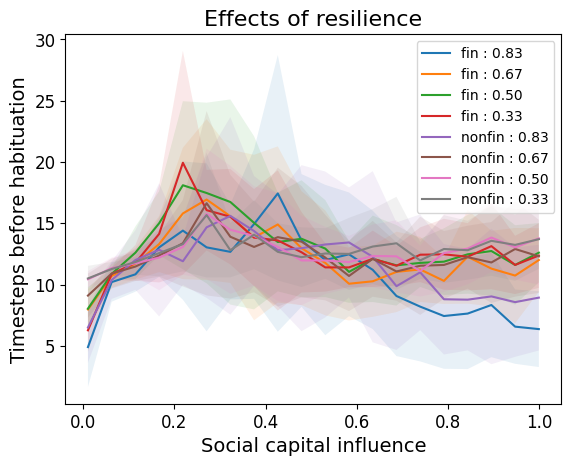

In [9]:
# Resillience effects plots

factors = ["fin", "nonfin"]
param_names = ["Social capital base", "Social capital influence"]
shocks = [5/6, 4/6, 3/6, 2/6]
y_labels = ["SWB difference", "Timesteps before habituation"]
bounds = [(0.25, 4), (0.01, 1)]
for param_index, param in enumerate(["soc_cap_inf", "soc_cap_base"]):
    data_fin = np.load(f"data/resilience_{param}fin.npy")
    data_nonfin = np.load(f"data/resilience_{param}nonfin.npy")
    for j in range(2):
        for data_index, data in enumerate([data_fin, data_nonfin]):
            means = np.mean(data, axis=1)
            stds = np.std(data, axis=1)
            x = np.linspace(bounds[param_index][0], bounds[param_index][1], 20)
            for i in range(4):
                plt.plot(x, means[:, i, j], label = f"{factors[data_index]} : {shocks[i]:.2f}")
                plt.fill_between(x, means[:, i, j]-stds[:, i, j], means[:, i, j]+stds[:, i, j], alpha=0.1)
        plt.title("Effects of resilience", fontsize=16)
        plt.xlabel(f"{param_names[param_index]}", fontsize=14)
        plt.ylabel(f"{y_labels[j]}", fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.legend()
        plt.savefig(f"figures/resilience_{param}_{j}.pdf", dpi=300)
        plt.show()

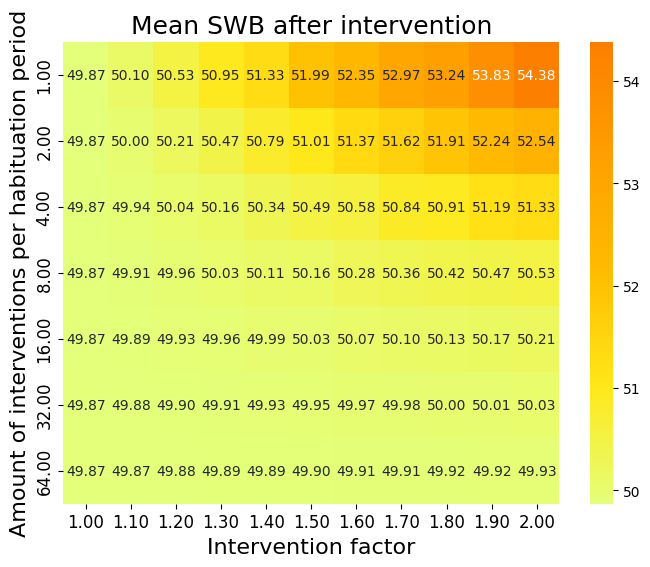

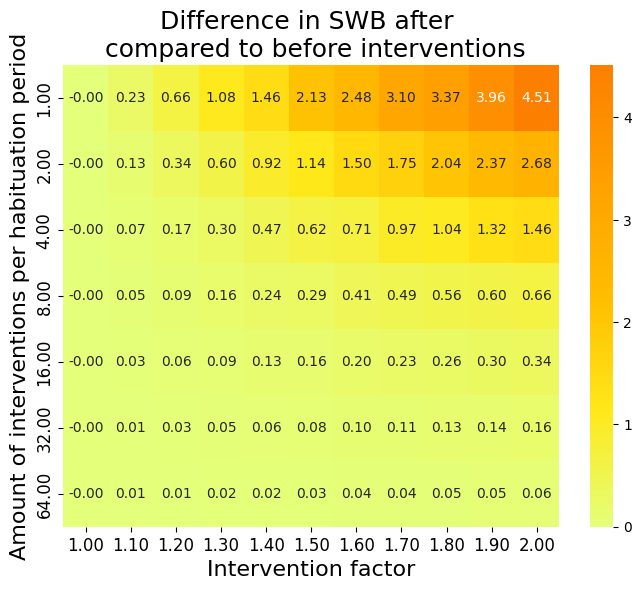

In [129]:
# Heatmaps

# Load data
load_data = np.load(f"data/heatmap_SWB_data.npy")
load_baseline = np.load(f"data/heatmap_SWB_baseline.npy")
# load_data = np.load(f"data/heatmap_chg_data.npy")

per_person = False
samples_1 = (2**np.linspace(1, 7, 7) * 0.5)
samples_2 = np.linspace(1, 2, 11)
params = ["intervention_gap", "hist_len"]
title_add = ""

data = np.mean(load_data, axis=2)

plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, cmap="Wistia", fmt=".2f")
if per_person:
    plt.title('Proportion of agents for which SWB \n changed after intervention', fontsize=16)
else:
    plt.title('Mean SWB after intervention', fontsize=18)
# plt.xlabel(f'Mean history length', fontsize=14)
# plt.ylabel(f'Intervention gap', fontsize=14)
plt.xlabel("Intervention factor", fontsize=16)
plt.ylabel("Amount of interventions per habituation period", fontsize=16)
plt.xticks(ticks=np.arange(len(samples_2)) + 0.5, labels=[f'{x:.2f}' for x in samples_2], fontsize=12)
plt.yticks(ticks=np.arange(len(samples_1)) + 0.5, labels=[f'{x:.2f}' for x in samples_1], fontsize=12)
plt.savefig(f"figures/heatmap{title_add}.pdf", dpi=300)
plt.show()

if not per_person:
    plt.figure(figsize=(8, 6))
    baseline = np.mean(load_baseline, axis=2)
    sns.heatmap(data-baseline, annot=True, cmap="Wistia", fmt=".2f")
    plt.title('Difference in SWB after \n compared to before interventions', fontsize=18)
    # plt.xlabel(f'Mean history length', fontsize=14)
    # plt.ylabel(f'Intervention gap', fontsize=14)
    plt.xlabel("Intervention factor", fontsize=16)
    plt.ylabel("Amount of interventions per habituation period", fontsize=16)
    plt.xticks(ticks=np.arange(len(samples_2)) + 0.5, labels=[f'{x:.2f}' for x in samples_2], fontsize=12)
    plt.yticks(ticks=np.arange(len(samples_1)) + 0.5, labels=[f'{x:.2f}' for x in samples_1], fontsize=12)
    plt.savefig(f"figures/heatmap_diff{title_add}.pdf", dpi=300)
    plt.show()

[0.122314   0.34350454 0.23475322 0.08450697 0.08214806 0.02020987
 0.00605423]


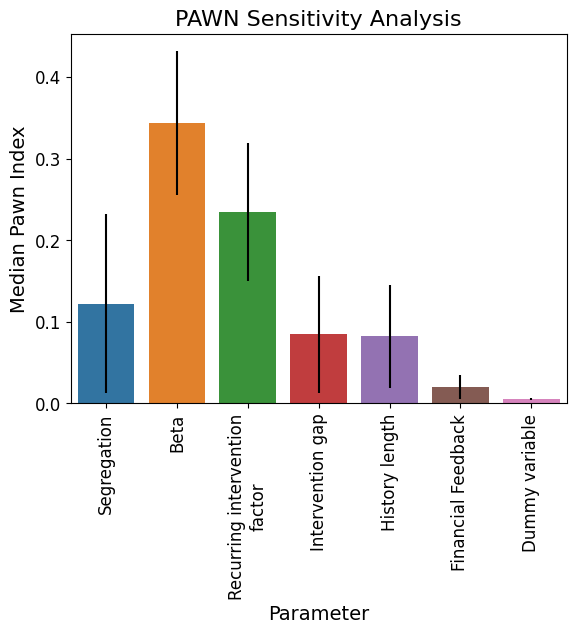

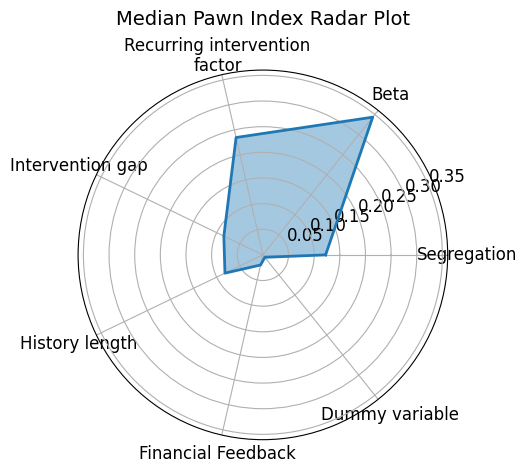

[0.06333793 0.0749459  0.3282846  0.14701068 0.06523603 0.04566365
 0.0060316 ]


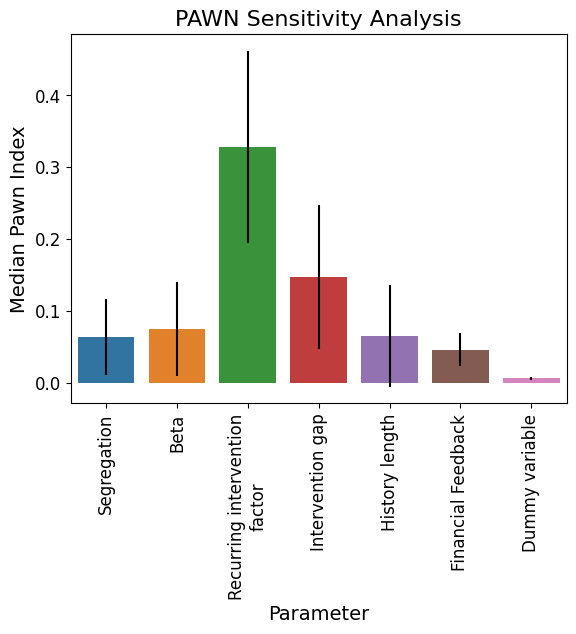

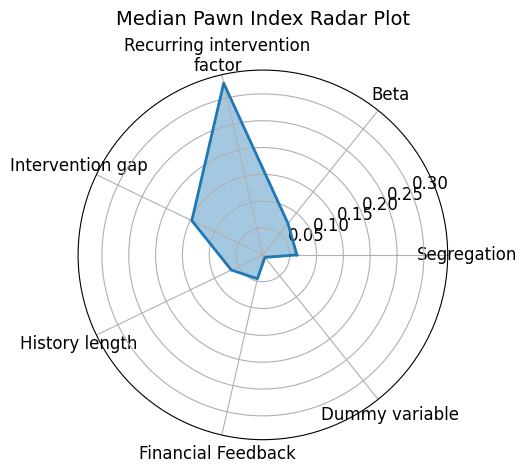

[0.07879386 0.09550372 0.0762694  0.22673735 0.18282493 0.08704275
 0.00452723]


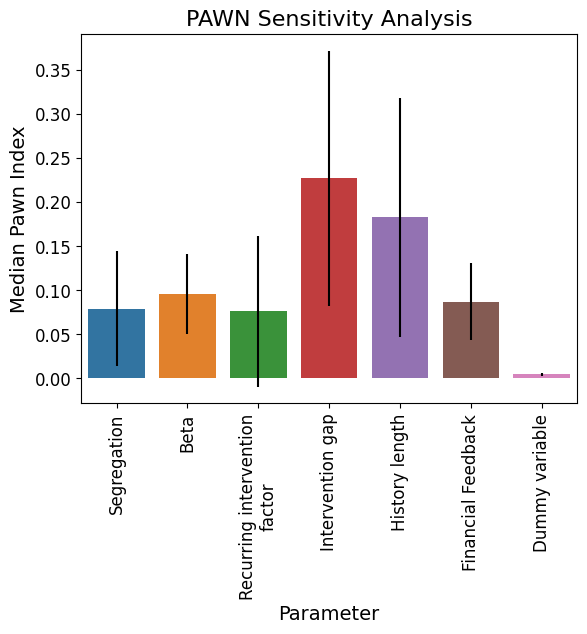

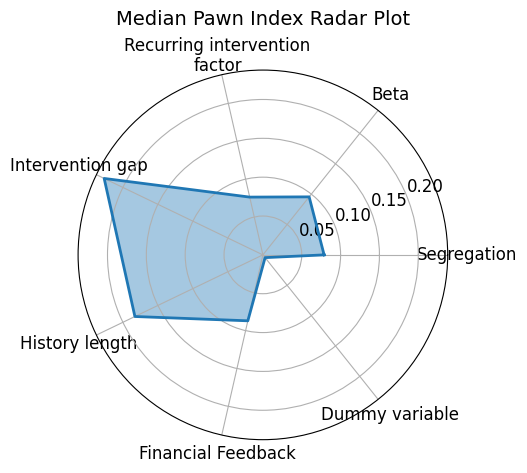

In [18]:
# GSA plots

df = pd.read_csv("data/param_space_behaviour_results_server.csv", index_col=0)
df_mean = df["Mean SWB"]
df_output = df["Percent changed positive"] - df["Percent changed negative"]
df_output_sum = df["Percent changed positive"] + df["Percent changed negative"]

parameters = ["segregation", "beta", "rec_intervention_factor", "intervention_gap", "hist_len", "fb_fin", "dummy"]
bounds = [(0, 10), (0, 20), (0.5, 2), (1, 50), (1, 50), (0, 2), (0, 5)]

paramater_names = ["Segregation", "Beta", "Recurring intervention\nfactor", "Intervention gap", "History length", "Financial Feedback", "Dummy variable"]

problem = {
        'num_vars': len(parameters),
        'names': parameters,
        'bounds': bounds
    }

param_values = df.iloc[:, 0:7].to_numpy()

names = ["SWB_mean", "changed", "total_changed"]
for index, output in enumerate([df_mean, df_output, df_output_sum]):
    Si = pawn.analyze(problem, param_values, output)
    print(Si["median"])

    Pawn_df = pd.DataFrame({
        'Parameter': problem['names'],
        'First Order': Si["median"],
        'Confidence Interval': Si["CV"],
        'Mean': Si["mean"]
    })

    # Plotting the PAWN sensitivity indices
    # plt.figure(figsize=(10, 6))
    sns.barplot(x='Parameter', y='First Order', data=Pawn_df, yerr=Pawn_df['Confidence Interval'] * Pawn_df["Mean"])
    plt.title('PAWN Sensitivity Analysis', fontsize=16)
    plt.xlabel('Parameter', fontsize=14)
    plt.ylabel('Median Pawn Index', fontsize=14)

    # Rotate x-axis labels to be vertical and set font size
    plt.xticks(ticks=range(len(paramater_names)), labels=paramater_names, rotation=90, fontsize=12)
    plt.yticks(fontsize=12)

    # Save the figure with a specified DPI
    plt.savefig(f'figures/pawn_{names[index]}.pdf', dpi=300)

    # Show the plot
    plt.show()

    # Sample data
    parameters_list = Pawn_df["Parameter"].to_list()
    values_list = Pawn_df["First Order"].to_list()  # Replace with actual sensitivity indices

    # Number of variables
    num_vars = len(parameters_list)

    # Compute angle for each axis
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]  # Complete the loop

    # Initialize radar plot
    fig, ax = plt.subplots( subplot_kw=dict(polar=True))

    # Plot data
    values_list += values_list[:1]  # Complete the loop
    ax.plot(angles, values_list, linewidth=2, linestyle='solid')

    # Fill area
    ax.fill(angles, values_list, alpha=0.4)

    # Add labels
    plt.xticks(angles[:-1], labels=paramater_names, fontsize=12)
    plt.yticks(fontsize=12)


    # Set y-labels
    # ax.set_rlabel_position(0)
    # plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=11)

    # Title
    plt.title('Median Pawn Index Radar Plot', size=14, color='black', y=1.1)

    plt.savefig(f"figures/Pawn_{names[index]}_radar.pdf", dpi=300)

    plt.show()

[0.1364467  0.37930271 0.10553898 0.05471382 0.07681173 0.04313741
 0.00524339]


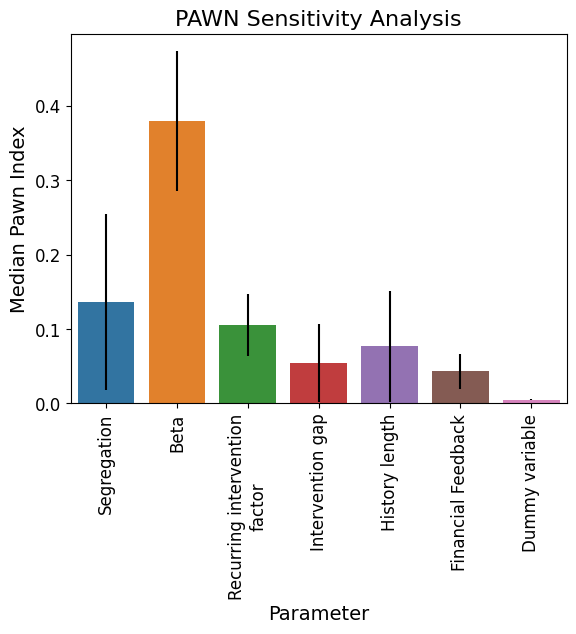

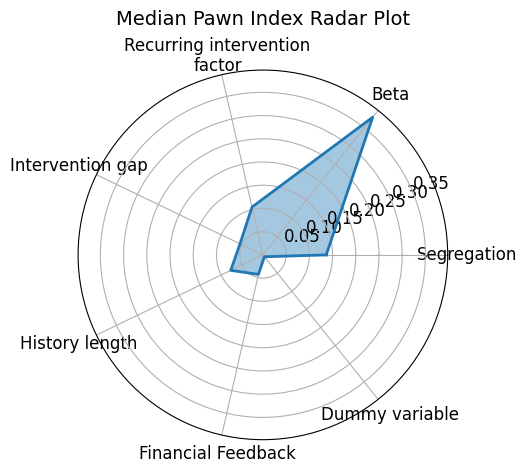

In [25]:
df_var = df["Var SWB"]

parameters = ["segregation", "beta", "rec_intervention_factor", "intervention_gap", "hist_len", "fb_fin", "dummy"]
bounds = [(0, 10), (0, 20), (0.5, 2), (1, 50), (1, 50), (0, 2), (0, 5)]

paramater_names = ["Segregation", "Beta", "Recurring intervention\nfactor", "Intervention gap", "History length", "Financial Feedback", "Dummy variable"]

problem = {
        'num_vars': len(parameters),
        'names': parameters,
        'bounds': bounds
    }

param_values = df.iloc[:, 0:7].to_numpy()

Si = pawn.analyze(problem, param_values, df_var)
print(Si["median"])

Pawn_df = pd.DataFrame({
    'Parameter': problem['names'],
    'First Order': Si["median"],
    'Confidence Interval': Si["CV"],
    'Mean': Si["mean"]
})

# Plotting the PAWN sensitivity indices
# plt.figure(figsize=(10, 6))
sns.barplot(x='Parameter', y='First Order', data=Pawn_df, yerr=Pawn_df['Confidence Interval'] * Pawn_df["Mean"])
plt.title('PAWN Sensitivity Analysis', fontsize=16)
plt.xlabel('Parameter', fontsize=14)
plt.ylabel('Median Pawn Index', fontsize=14)

# Rotate x-axis labels to be vertical and set font size
plt.xticks(ticks=range(len(paramater_names)), labels=paramater_names, rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Save the figure with a specified DPI
plt.savefig(f'figures/pawn_var.pdf', dpi=300)

# Show the plot
plt.show()

# Sample data
parameters_list = Pawn_df["Parameter"].to_list()
values_list = Pawn_df["First Order"].to_list()  # Replace with actual sensitivity indices

# Number of variables
num_vars = len(parameters_list)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Initialize radar plot
fig, ax = plt.subplots( subplot_kw=dict(polar=True))

# Plot data
values_list += values_list[:1]  # Complete the loop
ax.plot(angles, values_list, linewidth=2, linestyle='solid')

# Fill area
ax.fill(angles, values_list, alpha=0.4)

# Add labels
plt.xticks(angles[:-1], labels=paramater_names, fontsize=12)
plt.yticks(fontsize=12)

# Title
plt.title('Median Pawn Index Radar Plot', size=14, color='black', y=1.1)

plt.savefig(f"figures/Pawn_var_radar.pdf", dpi=300)

plt.show()

C:\Users\arend\AppData\Local\Temp\ipykernel_22896\2911860314.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_copy = df_copy.groupby("binned").mean()
C:\Users\arend\AppData\Local\Temp\ipykernel_22896\2911860314.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_dev = df.groupby(pd.cut(df[parameter], bins))["Mean SWB"].std()


[3.68670130e-02 4.96112647e+01]


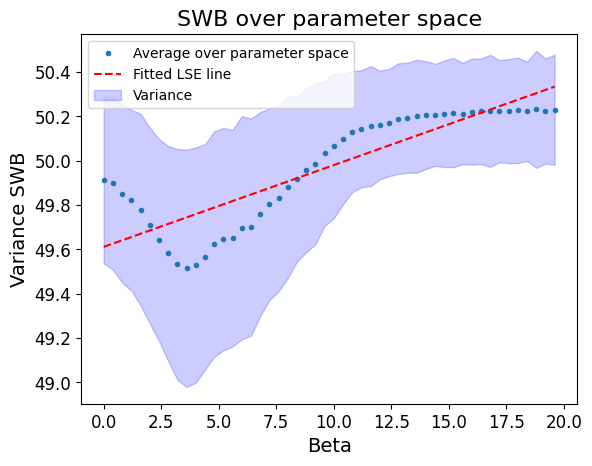

C:\Users\arend\AppData\Local\Temp\ipykernel_22896\2911860314.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_copy = df_copy.groupby("binned").mean()
C:\Users\arend\AppData\Local\Temp\ipykernel_22896\2911860314.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_dev = df.groupby(pd.cut(df[parameter], bins))["Mean SWB"].std()


[-3.10501233e-02  5.01247116e+01]


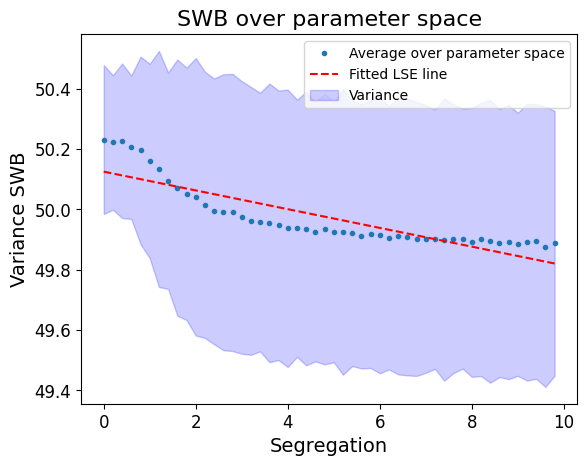

In [38]:
# OFAT Paramater space plots

amount_bins = 51
title_add = ""
names = ["Beta", "Segregation"]
for index, parameter in enumerate(["beta", "segregation"]):
    df_copy = df.copy()
    bottom_bin = min(df_copy[parameter])
    top_bin = max(df_copy[parameter])
    bins = np.linspace(bottom_bin, top_bin, amount_bins)
    df_copy["binned"] = pd.cut(df_copy[parameter], bins)
    df_copy = df_copy.groupby("binned").mean()

    # Perform linear regression using numpy.polyfit
    coefficients, res, _, _, _ = np.polyfit(bins[:-1], df_copy["Mean SWB"], 1, full=True)  # 1 indicates a linear fit
    print(coefficients)
    polynomial = np.poly1d(coefficients)
    line = polynomial(bins[:-1])

    # Calculate standard deviation for variance lines
    std_dev = df.groupby(pd.cut(df[parameter], bins))["Mean SWB"].std()

    plt.plot(bins[:-1], df_copy["Mean SWB"].to_numpy(), marker=".", linestyle="", label="Average over parameter space")
    plt.plot(bins[:-1], line, color="red", linestyle="--", label=f"Fitted LSE line")

    # Plot the variance lines
    plt.fill_between(bins[:-1], df_copy["Mean SWB"] - std_dev, df_copy["Mean SWB"] + std_dev, color='blue', alpha=0.2, label="Variance")

    plt.legend()
    plt.title("SWB over parameter space", fontsize=16)
    plt.xlabel(f"{names[index]}", fontsize=14)
    plt.ylabel("Variance SWB", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(f"figures/GSA_{parameter}{title_add}.pdf", dpi=300)
    plt.show()


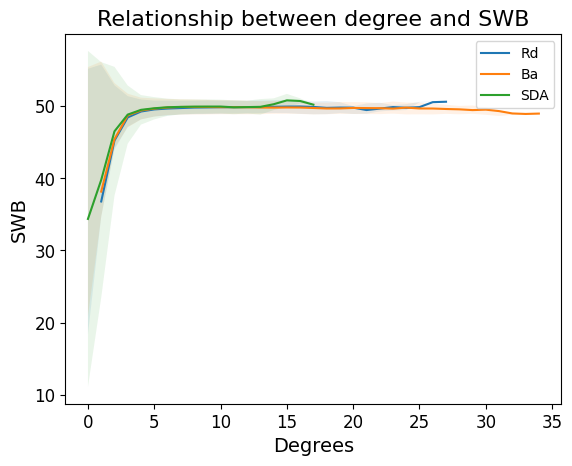

In [8]:
# Social capital - Degree plot

for network in ["Rd", "Ba","SDA"]:
    df2 = pd.read_csv(f"data/degree_SWB_{network}.csv", index_col=0)
    means = df2.groupby("degree").mean()["SWB"]
    stds = df2.groupby("degree").std()["SWB"]
    plt.plot(means, label=network)
    plt.fill_between(np.linspace(0, len(means)-1, len(means)), means-stds, means+stds, alpha=0.1)
plt.legend(fontsize=20)
plt.title("Relationship between degree and SWB", fontsize=16)
plt.xlabel(f"Degrees", fontsize=14)
plt.ylabel(f"SWB", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.savefig(f"figures/degreeSWB.pdf", dpi=300)
plt.show()

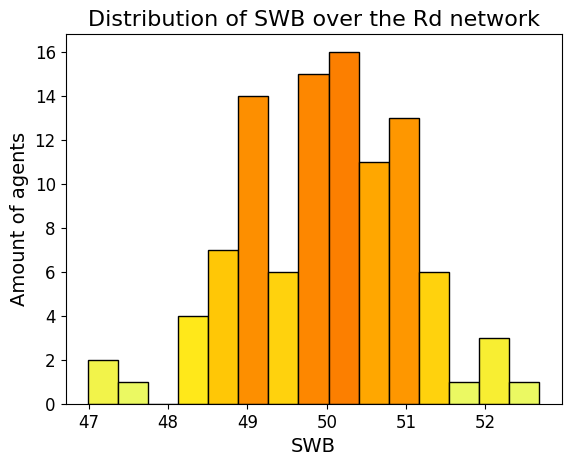

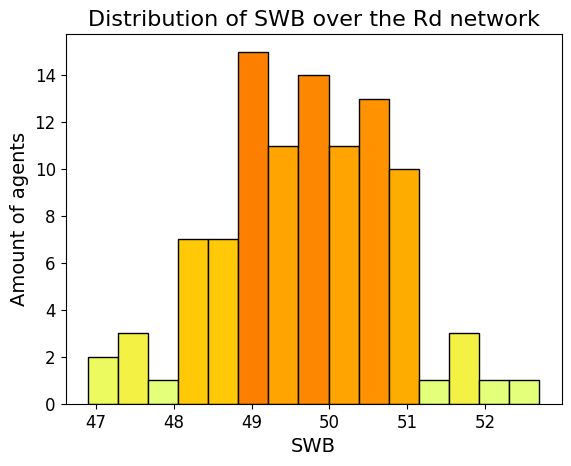

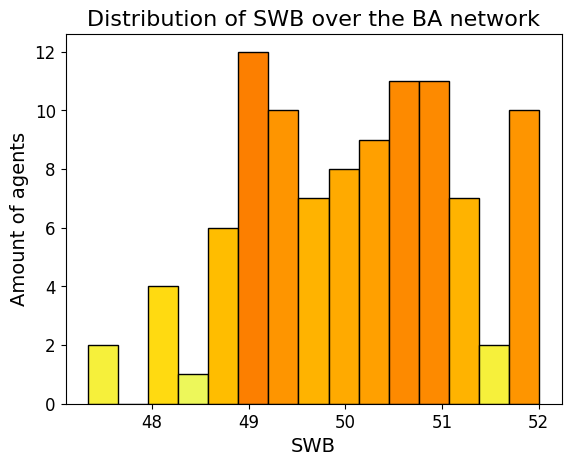

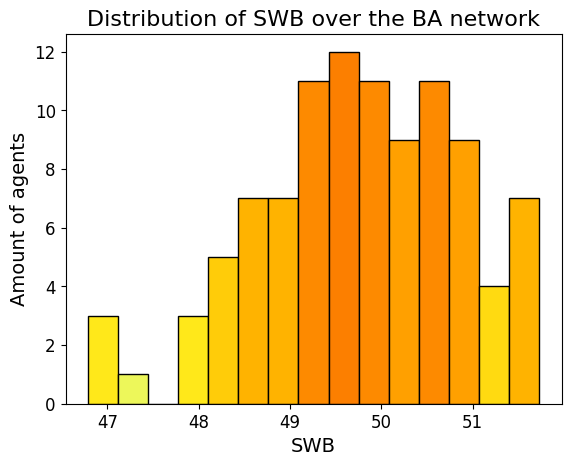

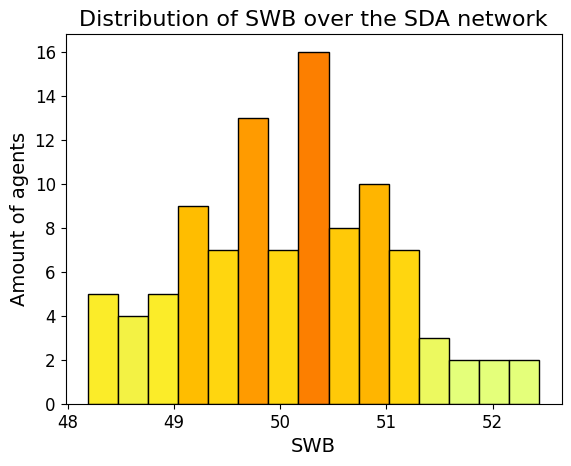

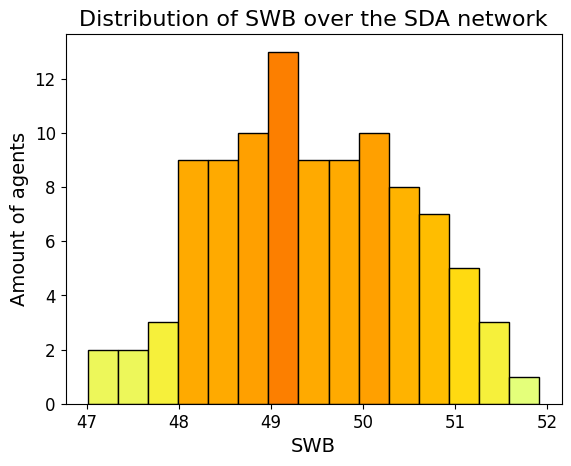

In [193]:
# Distribution of SWB over population histograms

for network in ["Rd", "BA", "SDA"]:
    output = np.load(f"data/{network}_output_100_.npy")
    begin_data = np.mean(output[0, :, 0], axis=0)
    end_data = np.mean(output[0, :, 200], axis=0)
    for data in [begin_data, end_data]:
        # Create the histogram
        counts, _, patches = plt.hist(data, bins=15, edgecolor='black')

        # Apply the Wistia colormap
        colormap = plt.cm.get_cmap('Wistia')

        # Normalize the counts to the range [0, 1] for the colormap
        norm = plt.Normalize(counts.min(), counts.max())

        # Apply the colormap to each patch (bin)
        for count, patch in zip(counts, patches):
            color = colormap(norm(count))
            patch.set_facecolor(color)

        # Add colorbar
        sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
        sm.set_array([])

        plt.title(f'Distribution of SWB over the {network} network', fontsize=16)
        plt.xlabel('SWB', fontsize=14)
        plt.ylabel('Amount of agents', fontsize=14)

        # Rotate x-axis labels to be vertical and set font size
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()
        # plt.savefig(f"figures/hist{title_add}.pdf", dpi=300)
        plt.clf()
        plt.close() 

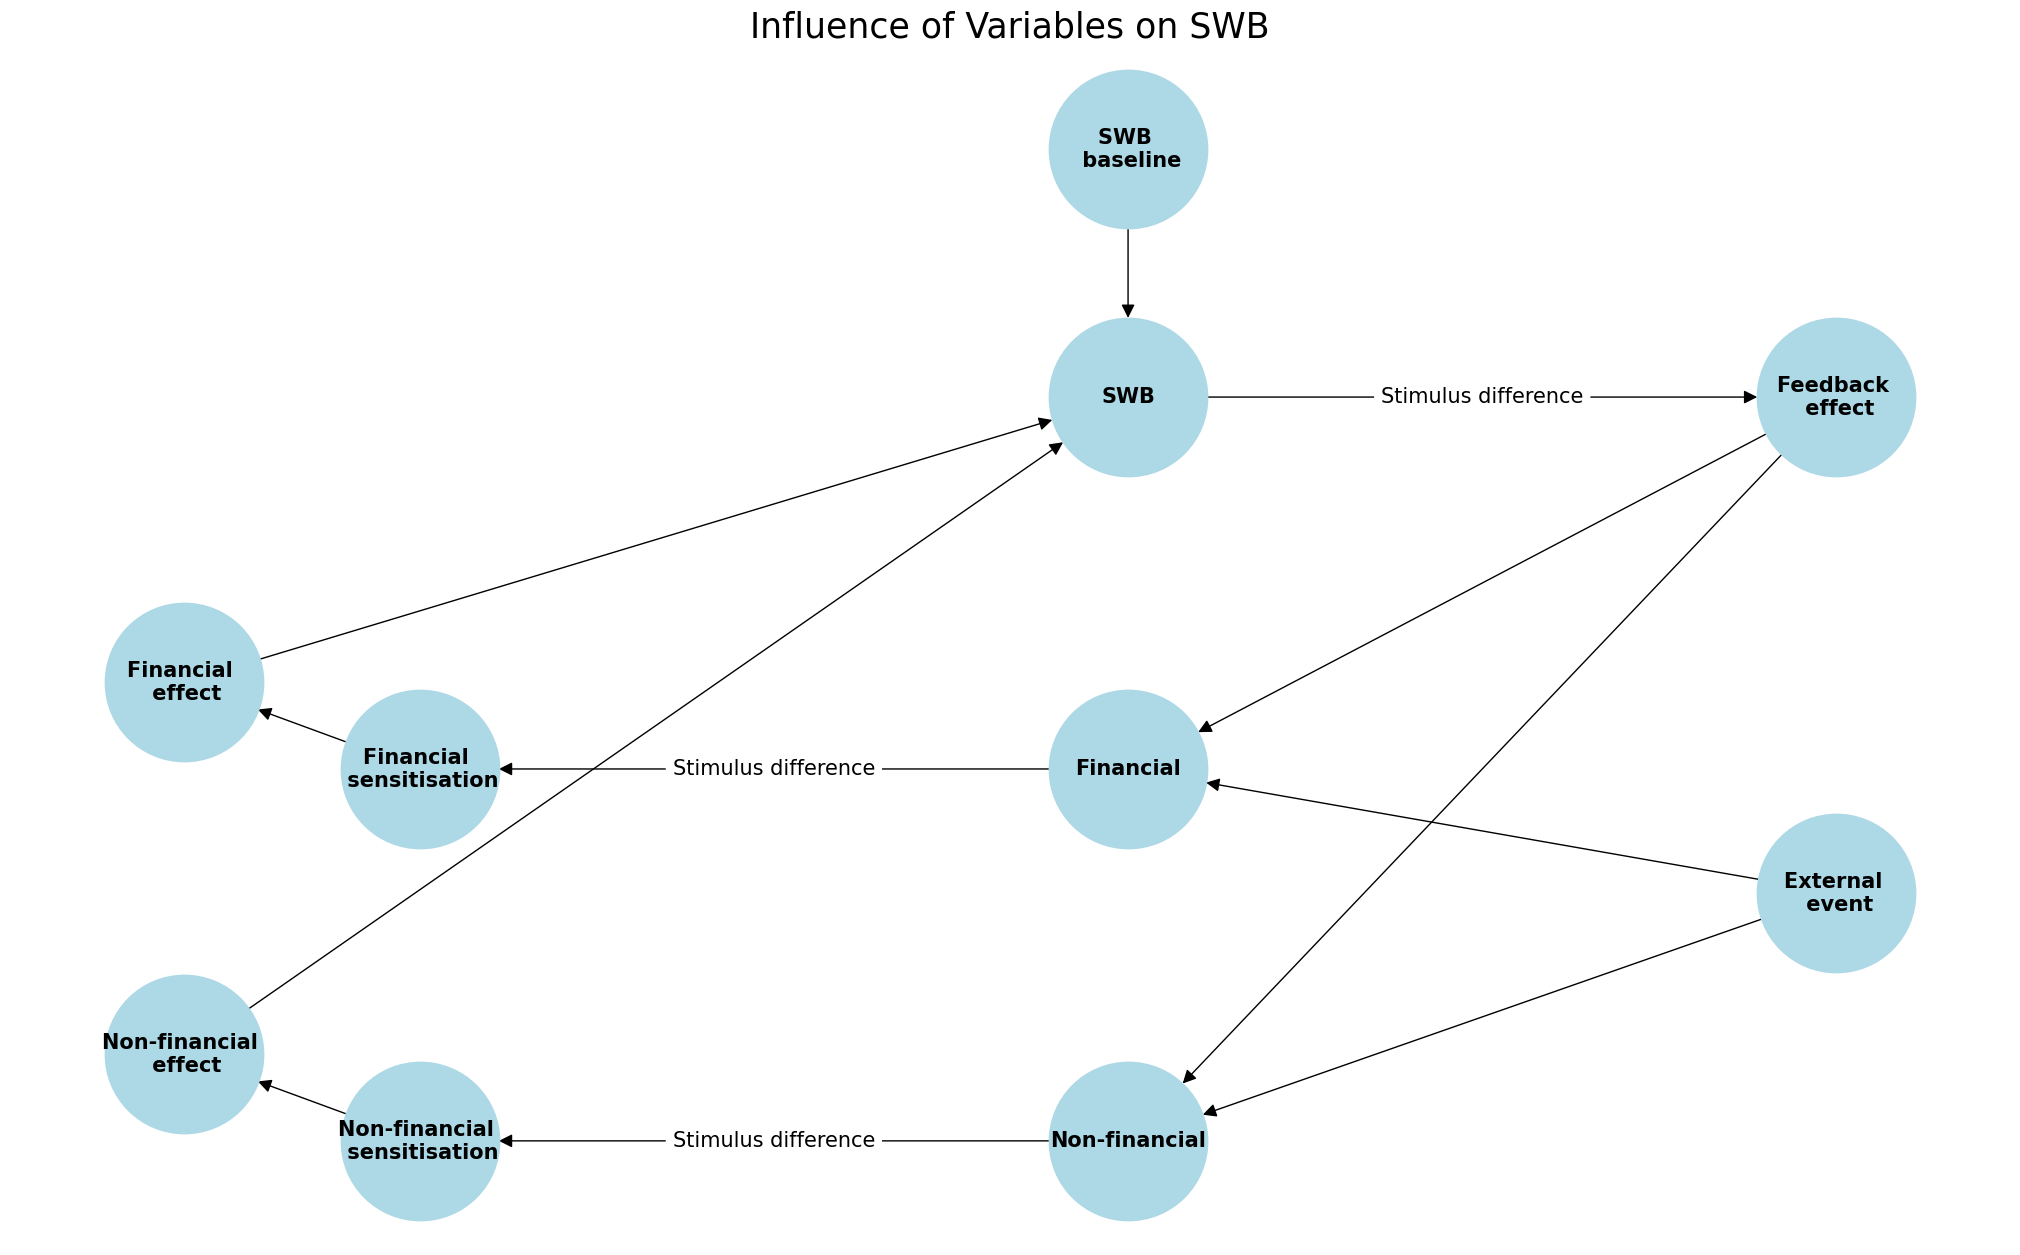

In [45]:
# Agent example network
G = nx.DiGraph()

# Add nodes
G.add_node('SWB')
G.add_node('Financial')
G.add_node('Non-financial')
G.add_node('SWB \n baseline')
# G.add_node('RFC')
# G.add_node('Social capital')
G.add_node('Financial \n sensitisation')
G.add_node('Non-financial \n sensitisation')
G.add_node('External \n event')
G.add_node('Financial \n effect')
G.add_node('Non-financial \n effect')
G.add_node('Feedback \n effect')

# Add edges
G.add_edge('SWB', 'Feedback \n effect')
G.add_edge('Financial \n sensitisation', 'Financial \n effect')
G.add_edge('Non-financial \n sensitisation', 'Non-financial \n effect')
G.add_edge('SWB \n baseline', 'SWB')
G.add_edge('Financial', 'Financial \n sensitisation')
G.add_edge('Non-financial', 'Non-financial \n sensitisation')
# G.add_edge('RFC', 'Financial \n effect')
# G.add_edge('Financial', 'RFC')
# G.add_edge('Financial', 'Social capital')
# G.add_edge('Non-financial', 'Social capital')
# G.add_edge('Social capital', 'Non-financial \n effect')
G.add_edge('External \n event', 'Financial')
G.add_edge('External \n event', 'Non-financial')
# G.add_edge('External \n event', 'Financial \n sensitisation')
# G.add_edge('External \n event', 'Non-financial \n sensitisation')
G.add_edge('Financial \n effect', 'SWB')
G.add_edge('Non-financial \n effect', 'SWB')
G.add_edge('Feedback \n effect', 'Financial')
G.add_edge('Feedback \n effect', 'Non-financial')

# Define the positions of the nodes
pos = {
    'SWB': (0.5, 0.7),
    'Financial': (0.5, 0.4),
    'Non-financial': (0.5, 0.1),
    'SWB \n baseline': (0.5, 0.9),
    # 'RFC': (0.5, 0.55),
    # 'Social capital': (0.5, 0.25),
    'Financial \n sensitisation': (0.35, 0.4),
    'Non-financial \n sensitisation': (0.35, 0.1),
    'External \n event': (0.65, 0.3),
    'Financial \n effect': (0.3, 0.47),
    'Non-financial \n effect': (0.3, 0.17),
    'Feedback \n effect': (0.65, 0.7),
}

# Draw the graph
plt.figure(figsize=(20, 12))
nx.draw(G, pos, with_labels=True, node_size=13000, node_color='lightblue', font_size=15, font_weight='bold', arrowsize=20)

# Add the labels
labels = {
    ('SWB', 'Feedback \n effect'): 'Stimulus difference',
    ('Financial', 'Financial \n sensitisation'): 'Stimulus difference',
    ('Non-financial', 'Non-financial \n sensitisation'): 'Stimulus difference',
}

# Draw the edges with labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=15)

plt.title('Influence of Variables on SWB', fontsize=25)
plt.savefig("figures/Agentfigure.pdf", dpi=300)
plt.show()


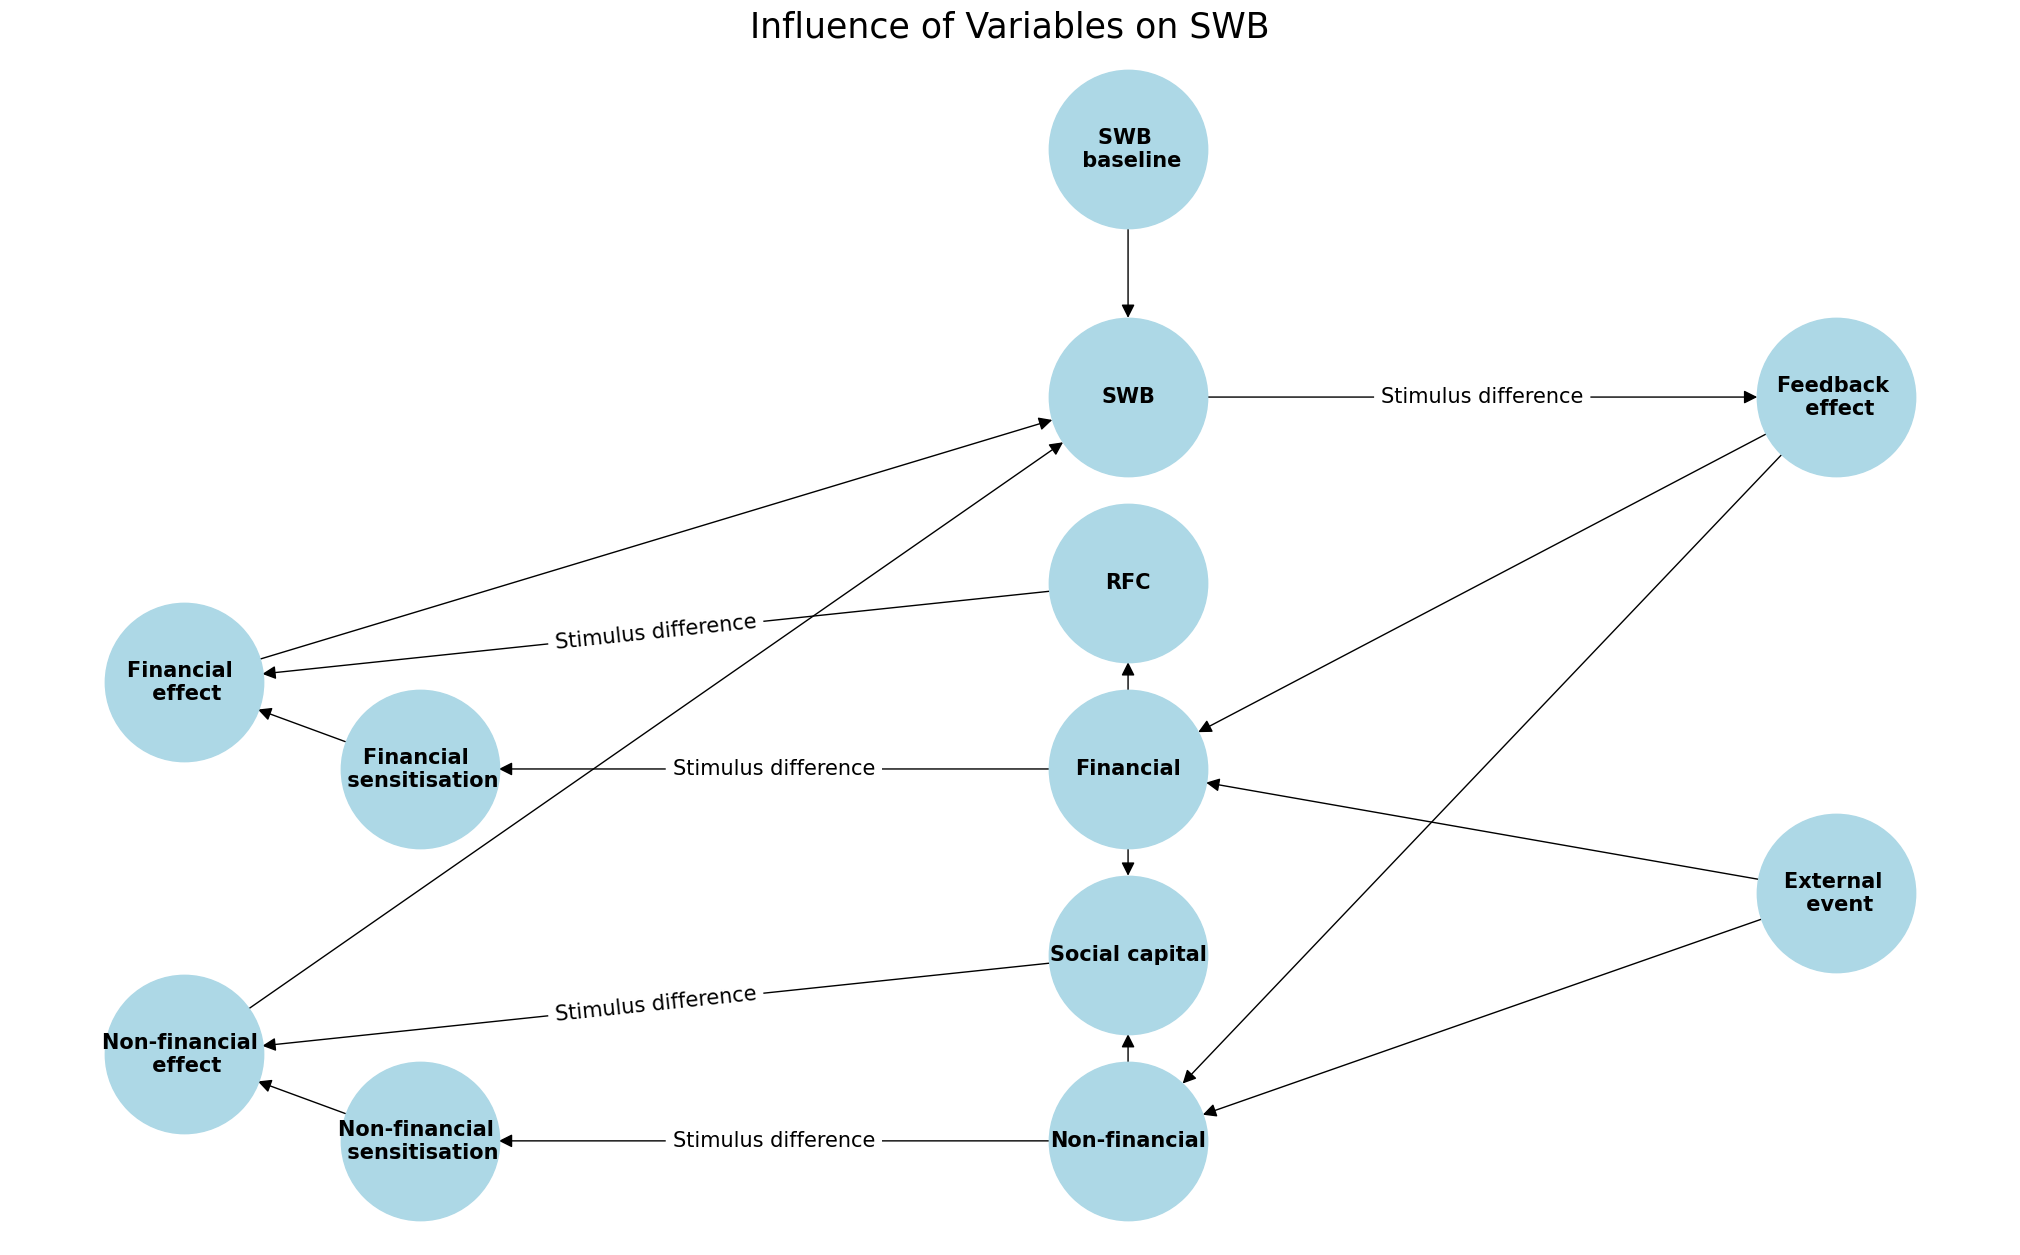

In [47]:
# Total example newtork
G = nx.DiGraph()

# Add nodes
G.add_node('SWB')
G.add_node('Financial')
G.add_node('Non-financial')
G.add_node('SWB \n baseline')
G.add_node('RFC')
G.add_node('Social capital')
G.add_node('Financial \n sensitisation')
G.add_node('Non-financial \n sensitisation')
G.add_node('External \n event')
G.add_node('Financial \n effect')
G.add_node('Non-financial \n effect')
G.add_node('Feedback \n effect')

# Add edges
G.add_edge('SWB', 'Feedback \n effect')
G.add_edge('Financial \n sensitisation', 'Financial \n effect')
G.add_edge('Non-financial \n sensitisation', 'Non-financial \n effect')
G.add_edge('SWB \n baseline', 'SWB')
G.add_edge('Financial', 'Financial \n sensitisation')
G.add_edge('Non-financial', 'Non-financial \n sensitisation')
G.add_edge('RFC', 'Financial \n effect')
G.add_edge('Financial', 'RFC')
G.add_edge('Financial', 'Social capital')
G.add_edge('Non-financial', 'Social capital')
G.add_edge('Social capital', 'Non-financial \n effect')
G.add_edge('External \n event', 'Financial')
G.add_edge('External \n event', 'Non-financial')
# G.add_edge('External \n event', 'Financial \n sensitisation')
# G.add_edge('External \n event', 'Non-financial \n sensitisation')
G.add_edge('Financial \n effect', 'SWB')
G.add_edge('Non-financial \n effect', 'SWB')
G.add_edge('Feedback \n effect', 'Financial')
G.add_edge('Feedback \n effect', 'Non-financial')

# Define the positions of the nodes
pos = {
    'SWB': (0.5, 0.7),
    'Financial': (0.5, 0.4),
    'Non-financial': (0.5, 0.1),
    'SWB \n baseline': (0.5, 0.9),
    'RFC': (0.5, 0.55),
    'Social capital': (0.5, 0.25),
    'Financial \n sensitisation': (0.35, 0.4),
    'Non-financial \n sensitisation': (0.35, 0.1),
    'External \n event': (0.65, 0.3),
    'Financial \n effect': (0.3, 0.47),
    'Non-financial \n effect': (0.3, 0.17),
    'Feedback \n effect': (0.65, 0.7),
}

# Draw the graph
plt.figure(figsize=(20, 12))
nx.draw(G, pos, with_labels=True, node_size=13000, node_color='lightblue', font_size=15, font_weight='bold', arrowsize=20)

# Add the labels
labels = {
    ('SWB', 'Feedback \n effect'): 'Stimulus difference',
    ('Financial', 'Financial \n sensitisation'): 'Stimulus difference',
    ('Non-financial', 'Non-financial \n sensitisation'): 'Stimulus difference',
    ('RFC', 'Financial \n effect'): 'Stimulus difference',
    ('Social capital', 'Non-financial \n effect'): 'Stimulus difference',
}

# Draw the edges with labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=15)

plt.title('Influence of Variables on SWB', fontsize=25)
plt.savefig("figures/Networkfigure.pdf", dpi=300)
plt.show()


[0.5 1.  1.5 2.  2.5 3. ]


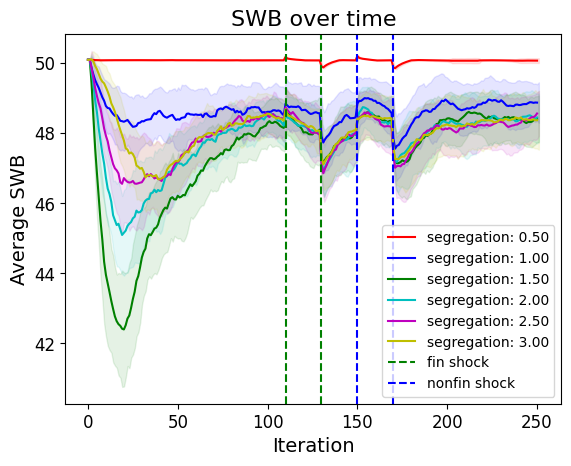

In [195]:
# OFAT plots

param_name = "segregation"

data = np.load(f"data/stochplot_{param_name}.npz")
SWB_data = data["arr_0"]
param_steps = np.linspace(param_dict[param_name][0], param_dict[param_name][1], 6)
intervention_timesteps = params["int_ts"]
int_var = params["int_var"]
title_add = ""

line_color = "black"
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:brown', 'tab:pink', 'tab:gray']
added_to_legend = []
for index, param_step in enumerate(SWB_data):
    stds = np.std(param_step, axis=0)
    means = np.mean(param_step, axis=0)
    plt.fill_between(np.linspace(0, len(means), len(means)), means-stds, means+stds, color=colors[index], alpha=0.1)
    plt.plot(means, label=f"{param_name}: {param_steps[index]:.2f}", color=colors[index])
for index, intervention in enumerate(intervention_timesteps):
    if int_var[index] == "fin":
        line_color = "green"
    elif int_var[index] == "nonfin":
        line_color = "blue"
    if int_var[index] not in added_to_legend:
        plt.axvline(x=intervention, color=line_color, linestyle='--', label=int_var[index] + " shock")
        added_to_legend.append(int_var[index])
    else:
        plt.axvline(x=intervention, color=line_color, linestyle='--')
plt.legend()
plt.title("SWB over time", fontsize=16)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Average SWB", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(f"figures/OFAT/{title_add}{param_name}/SWB_{param_name}.pdf", dpi=300)
plt.show()

In [44]:
df.head()

,segregation,beta,rec_intervention_factor,intervention_gap,hist_len,fb_fin,dummy,Mean SWB norm,Var SWB norm,Mean SWB,...,Var degree,Mean SWB before intervention,Var SWB before intervention,Mean SWB after intervention,Var SWB after intervention,System behaviour,Percent changed positive,Percent changed negative,Percent not changed,System changed
0,8.704825,8.463523,0.565378,38.326967,47.684823,1.212375,3.528699,50.120144,1.249802,49.385152,...,51.353070,49.033223,45.628133,49.759990,5.400741,0.0,0.18,0.33,0.49,1.0
1,6.770187,18.733461,0.565378,38.326967,47.684823,1.212375,3.528699,50.120144,1.249802,50.098929,...,51.303525,50.150379,1.327606,50.087276,1.975150,0.0,0.13,0.63,0.24,0.0
2,6.770187,8.463523,1.174392,38.326967,47.684823,1.212375,3.528699,50.120144,1.249802,49.384950,...,51.240916,48.812484,55.032342,50.035396,6.978147,0.0,0.33,0.12,0.55,1.0
3,6.770187,8.463523,0.565378,5.017052,47.684823,1.212375,3.528699,50.120144,1.249802,48.598508,...,54.138729,48.353310,72.950835,49.312448,24.713997,0.0,0.28,0.51,0.21,1.0
4,6.770187,8.463523,0.565378,38.326967,4.608897,1.212375,3.528699,50.120144,1.249802,50.022220,...,51.240916,49.965469,7.779277,50.087333,1.768899,0.0,0.02,0.03,0.95,1.0
